KERDOUN WASSIM

----------------------

# CASE STUDY : OPTION PRICING (EUROPEAN OPTIONS)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import importlib
from EuropeanOptionPricing import EuropeanOption,implied_volatility,newton_raphson_iv,least_squares_iv,plot_vol_surface
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import datetime
import warnings
warnings.filterwarnings('ignore')

import EuropeanOptionPricing
importlib.reload(EuropeanOptionPricing)

%matplotlib inline

pio.renderers.default = "notebook"

plt.rcParams['figure.figsize']=(16,6)
plt.rcParams['axes.grid']=True

### BLACK-SCHOLES EXACT SOLUTION VS MERTON JUMP DIFFUSION VS BINOMIAL TREES

#### *Exact Solution Approach*

In [2]:
S_base = 100
K_base = 100
T_base = 1 #year
r_base = 0.05
sigma_base = 0.3

call_base = EuropeanOption(S_base,K_base,T_base,r_base,sigma_base,'call')
put_base = EuropeanOption(S_base,K_base,T_base,r_base,sigma_base,'put')

S_range = np.linspace(S_base*0.5,S_base*1.5,100)
K_range = np.linspace(K_base*0.5,K_base*1.5,100)
T_range = np.linspace(T_base*0.1,T_base*2,100)
r_range = np.linspace(r_base*0.1,r_base*2,100)
sigma_range = np.linspace(sigma_base*0.1,sigma_base*2,100)

print(call_base)
print(put_base)

European call option | S = $100 | K = $100 | T = 1 year | r = 5.0% | C = $14.23
European put option | S = $100 | K = $100 | T = 1 year | r = 5.0% | C = $9.35


#### *Merton Jump Diffusion Approach*

In [3]:
mu_j = -0.1
sigma_j = 0.15
lam = 0.5
max_iter = 100 
stop_cond = 1e-15

merton_call = call_base.merton_jump_diffusion(mu_j,sigma_j,lam,max_iter,stop_cond)
merton_put = put_base.merton_jump_diffusion(mu_j,sigma_j,lam,max_iter,stop_cond)

print(f'Call Option Price Using Merton Jump Diffusion : ${merton_call:.2f}')
print(f'Put Option Price Using Merton Jump Diffusion : ${merton_put:.2f}')

Call Option Price Using Merton Jump Diffusion : $14.98
Put Option Price Using Merton Jump Diffusion : $10.48


#### *Binomial Tree Approach*

In [4]:
n = 100 # Number of steps in the binomial tree

binomial_tree_call = call_base.binomial_tree(n)
binomial_tree_put = put_base.binomial_tree(n)

print(f'Call Option Price Using Binomial Tree : ${binomial_tree_call:.2f}')
print(f'Put Option Price Using Binomial Tree : ${binomial_tree_put:.2f}')

Call Option Price Using Binomial Tree : $14.20
Put Option Price Using Binomial Tree : $9.32


#### Now let's see how option parameters(spot price, volatility, maturity, risk-free rate) influence the GREEKS (Delta,Gamma,Theta,Rho)

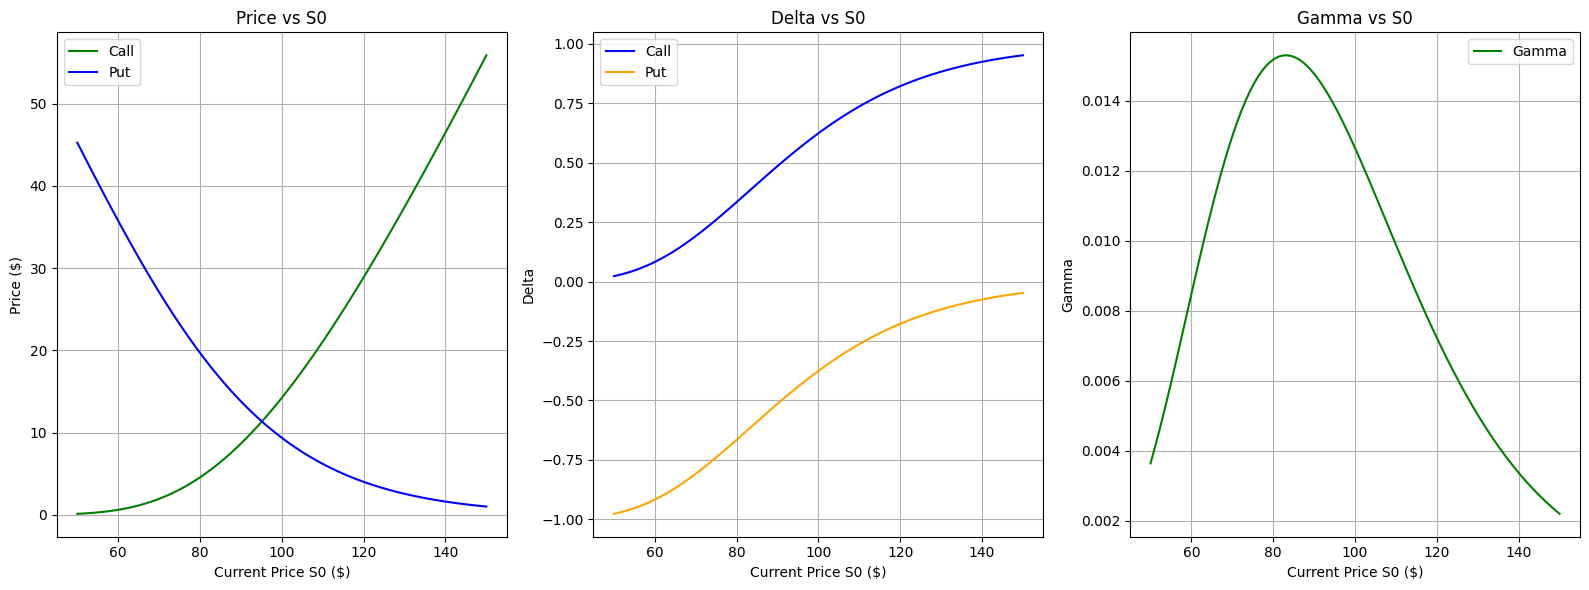

In [5]:
price_vs_S0_call = []
price_vs_S0_put = []
delta_vs_S0_call = []
delta_vs_S0_put = []
gamma_vs_S0 = []

for S in S_range:
    
    call = EuropeanOption(S,K_base,T_base,r_base,sigma_base,'call')
    put = EuropeanOption(S,K_base,T_base,r_base,sigma_base,'put')
    
    price_vs_S0_call.append(call.price)
    price_vs_S0_put.append(put.price)
    delta_vs_S0_call.append(call.delta())
    delta_vs_S0_put.append(put.delta())
    gamma_vs_S0.append(call.gamma())
    
fig, axes = plt.subplots(1,3)
axes = axes.flatten()

axes[0].plot(S_range,price_vs_S0_call,label='Call',color='green')
axes[0].plot(S_range,price_vs_S0_put,label='Put',color='blue')
axes[0].legend()
axes[0].set_ylabel('Price ($)')
axes[0].set_xlabel('Current Price S0 ($)')
axes[0].set_title(f'Price vs S0')

axes[1].plot(S_range, delta_vs_S0_call, label='Call', color='blue')
axes[1].plot(S_range, delta_vs_S0_put, label='Put', color='orange')
axes[1].set_ylabel('Delta')
axes[1].legend()
axes[1].set_xlabel('Current Price S0 ($)')
axes[1].set_title(f'Delta vs S0')

axes[2].plot(S_range, gamma_vs_S0, label='Gamma', color='green')
axes[2].set_xlabel('Current Price S0 ($)')
axes[2].set_ylabel('Gamma')
axes[2].legend()
axes[2].set_title(f'Gamma vs S0')

plt.tight_layout()
plt.show()

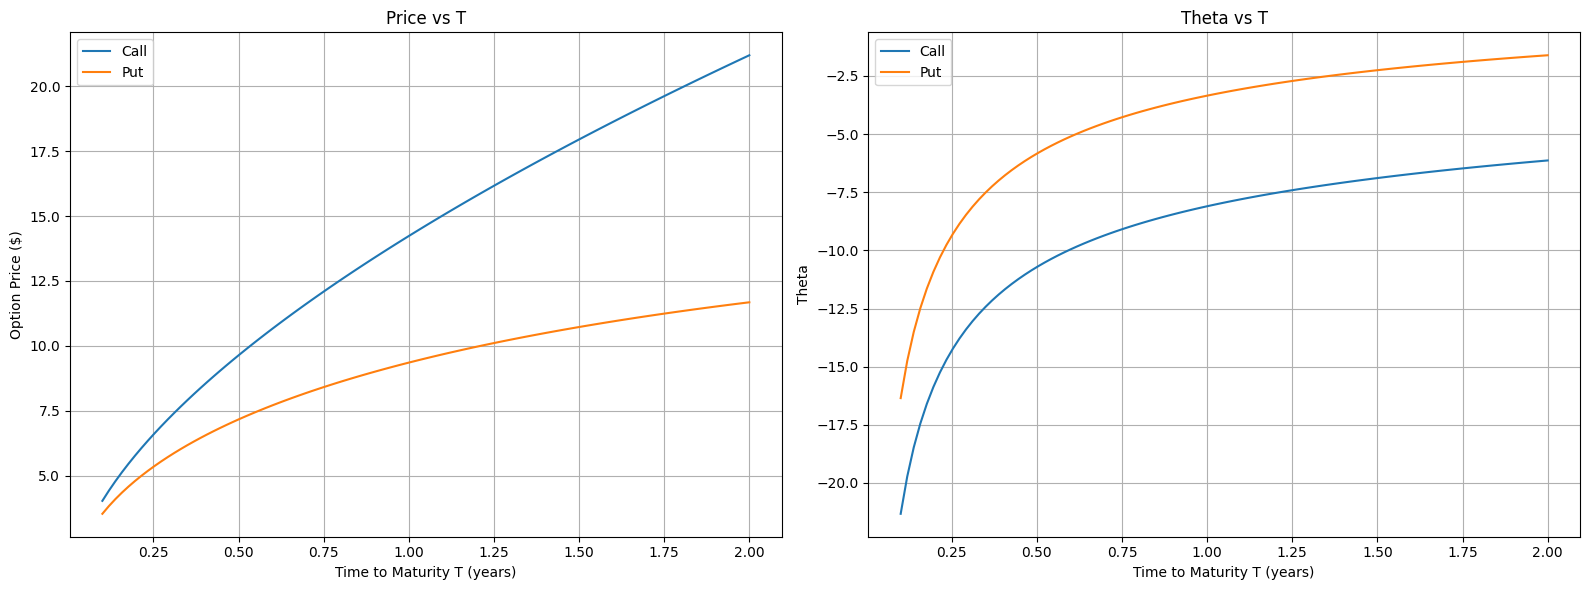

In [6]:
price_vs_T_call = []
price_vs_T_put = []
theta_vs_T_call = []
theta_vs_T_put = []

for T in T_range:
    call, put = EuropeanOption(S_base,K_base,T,r_base,sigma_base,'call'), EuropeanOption(S_base,K_base,T,r_base,sigma_base,'put')
    price_vs_T_call.append(call.price)
    price_vs_T_put.append(put.price)
    theta_vs_T_call.append(call.theta())
    theta_vs_T_put.append(put.theta())

fig, axs = plt.subplots(1,2)
axs[0].plot(T_range,price_vs_T_call,label='Call')
axs[0].plot(T_range,price_vs_T_put,label='Put')
axs[0].set_ylabel('Option Price ($)')
axs[0].set_xlabel("Time to Maturity T (years)")
axs[0].set_title("Price vs T")
axs[0].legend()

axs[1].plot(T_range,theta_vs_T_call,label='Call')
axs[1].plot(T_range,theta_vs_T_put,label='Put')
axs[1].set_ylabel('Theta')
axs[1].set_xlabel("Time to Maturity T (years)")
axs[1].set_title("Theta vs T")
axs[1].legend()

plt.tight_layout()
plt.show()

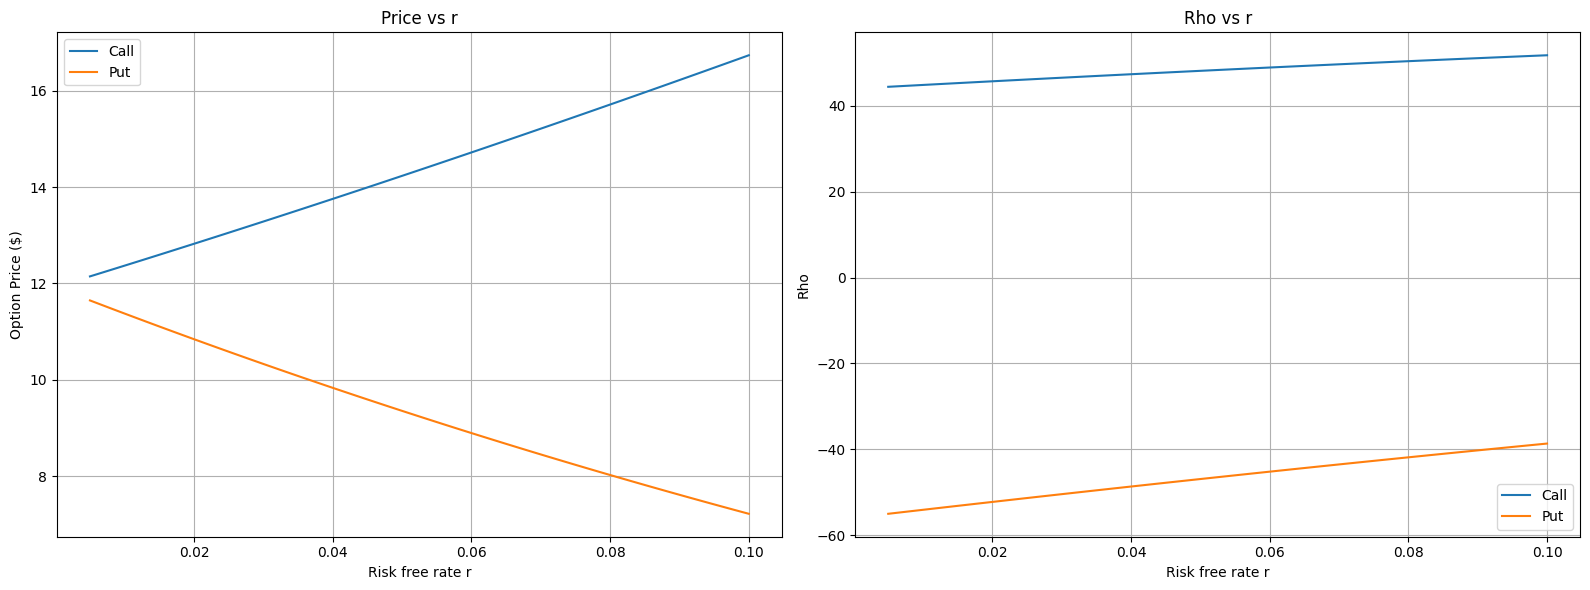

In [7]:
price_vs_r_call = []
price_vs_r_put = []
rho_vs_r_call = []
rho_vs_r_put = []

for r in r_range:
    call, put = EuropeanOption(S_base,K_base,T_base,r,sigma_base,'call'), EuropeanOption(S_base,K_base,T_base,r,sigma_base,'put')
    price_vs_r_call.append(call.price)
    price_vs_r_put.append(put.price)
    rho_vs_r_call.append(call.rho())
    rho_vs_r_put.append(put.rho())

fig, axs = plt.subplots(1,2)
axs[0].plot(r_range,price_vs_r_call,label='Call')
axs[0].plot(r_range,price_vs_r_put,label='Put')
axs[0].set_ylabel('Option Price ($)')
axs[0].set_xlabel("Risk free rate r")
axs[0].set_title("Price vs r")
axs[0].legend()

axs[1].plot(r_range,rho_vs_r_call,label='Call')
axs[1].plot(r_range,rho_vs_r_put,label='Put')
axs[1].set_ylabel('Rho')
axs[1].set_xlabel("Risk free rate r")
axs[1].set_title("Rho vs r")
axs[1].legend()

plt.tight_layout()
plt.show()

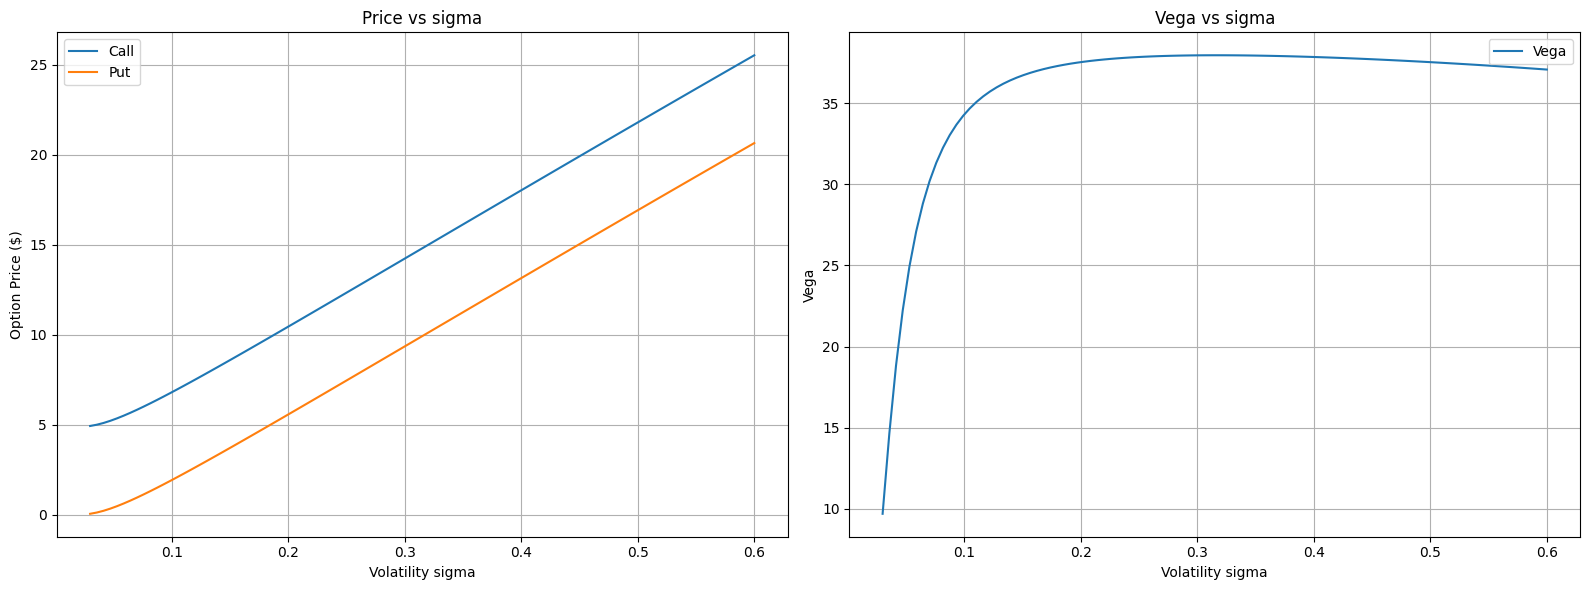

In [8]:
price_vs_sigma_call = []
price_vs_sigma_put = []
vega_vs_sigma_call = []

for sigma in sigma_range:
    call, put = EuropeanOption(S_base,K_base,T_base,r_base,sigma,'call'), EuropeanOption(S_base,K_base,T_base,r_base,sigma,'put')
    price_vs_sigma_call.append(call.price)
    price_vs_sigma_put.append(put.price)
    vega_vs_sigma_call.append(call.vega())

fig, axs = plt.subplots(1,2)
axs[0].plot(sigma_range,price_vs_sigma_call,label='Call')
axs[0].plot(sigma_range,price_vs_sigma_put,label='Put')
axs[0].set_ylabel('Option Price ($)')
axs[0].set_xlabel("Volatility sigma")
axs[0].set_title("Price vs sigma")
axs[0].legend()

axs[1].plot(sigma_range,vega_vs_sigma_call,label='Vega')
axs[1].set_ylabel('Vega')
axs[1].set_xlabel("Volatility sigma")
axs[1].set_title("Vega vs sigma")
axs[1].legend()

plt.tight_layout()
plt.show()

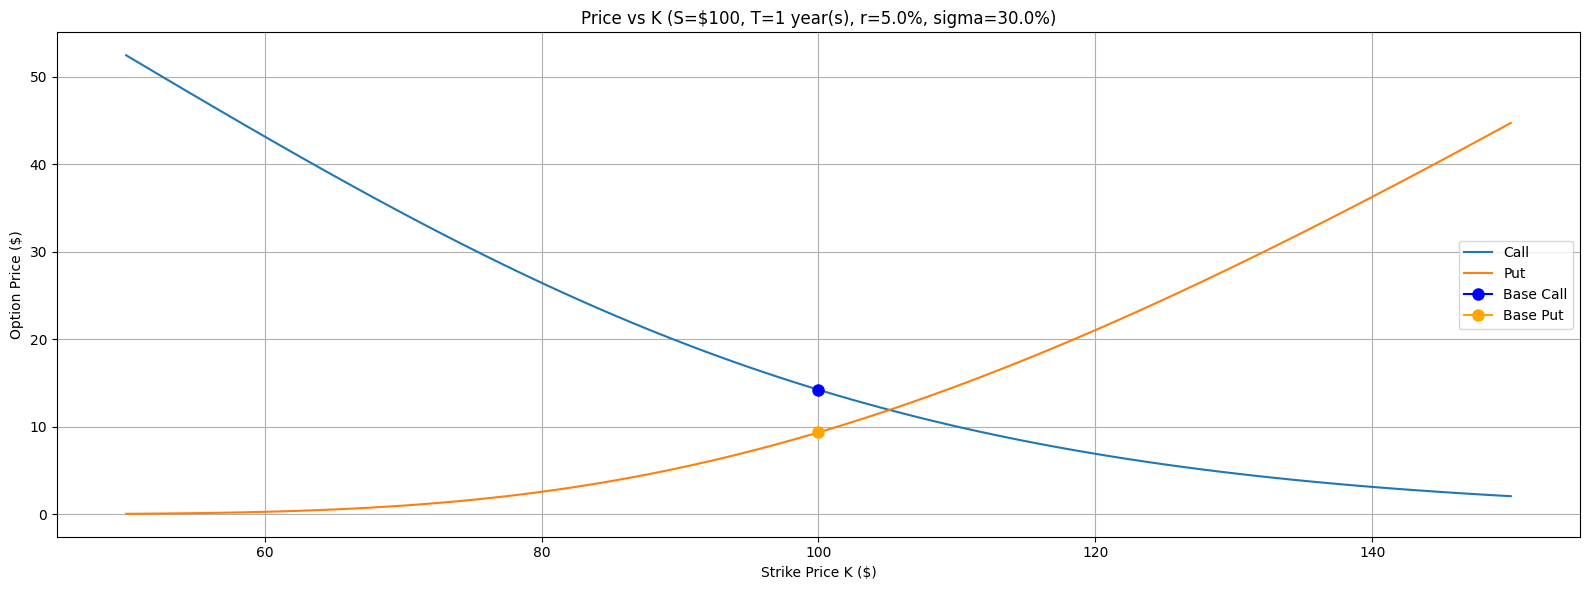

In [9]:
price_vs_K_call = []
price_vs_K_put = []

for K in K_range:
    price_vs_K_call.append(EuropeanOption(S_base,K,T_base,r_base,sigma_base,'call').price)
    price_vs_K_put.append(EuropeanOption(S_base,K,T_base,r_base,sigma_base,'put').price)

plt.figure()
plt.plot(K_range,price_vs_K_call,label='Call')
plt.plot(K_range,price_vs_K_put,label='Put')
plt.plot(K_base, call_base.price, label='Base Call',marker='o',color='blue',markersize=8)
plt.plot(K_base, put_base.price, label='Base Put',marker='o',color='orange',markersize=8)
plt.legend()
plt.ylabel('Option Price ($)')
plt.xlabel("Strike Price K ($)")
plt.title(f"Price vs K (S=${S_base}, T={T_base} year(s), r={r_base*100}%, sigma={sigma_base*100}%)")
plt.tight_layout()
plt.show()

#### Let's perform the Geomteric Brownian Motion Simulation on the underlying sample asset's price

Text(0, 0.5, '$S_t$')

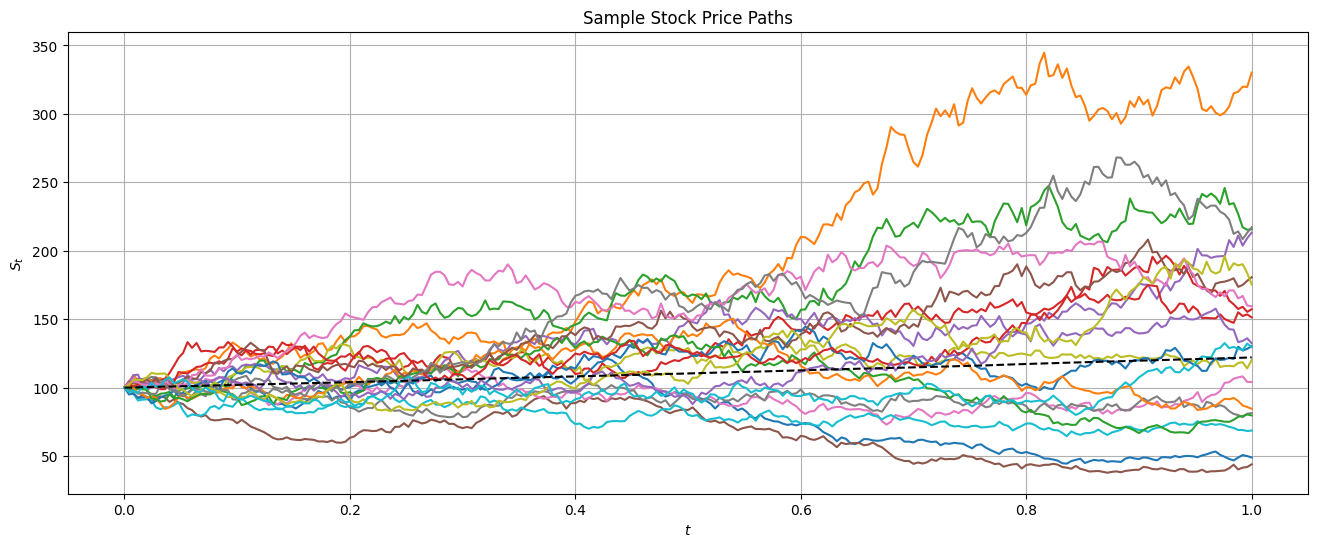

In [10]:
# Parameters
mu = 0.2
sigma = 0.4
n_sim = 20000
n_steps = 250
n_sims_to_plot = 20
T = 1
dt = T/n_steps
S0 = 100

t = np.linspace(0,T,n_steps+1)

# Compute the increments of the arithmetic brownian motion X = log(S/S0)
dX = (mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.normal(size=(n_sim, n_steps))

# Accumulate the increments starting at 0
X = np.concatenate((np.zeros((n_sim, 1)), np.cumsum(dX, axis=1)), axis=1)

# Transform to geometric Brownian motion
S = S0*np.exp(X)

for i in range(0,n_sim,round(n_sim/n_sims_to_plot)):
    plt.plot(t,S[i,:])
    
plt.plot(t,np.mean(S,axis=0),'k--')
plt.title('Sample Stock Price Paths')
plt.xlabel(r'$t$')
plt.ylabel(r'$S_t$')

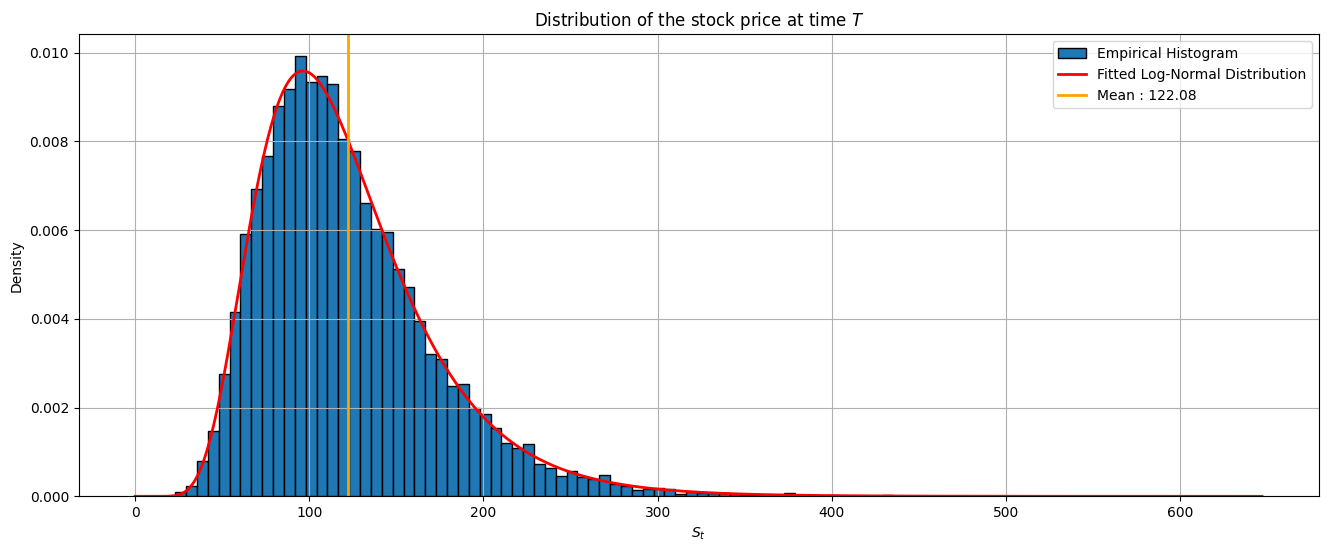

In [11]:
# Plot the distribution of the stock price at maturity

plt.hist(S[:,-1],density=True,bins=100,edgecolor='black',label='Empirical Histogram')
plt.title(r'Distribution of the stock price at time $T$')
plt.xlabel(r'$S_t$')
plt.ylabel('Density')

# fit a log-normal distribution
S_grid = range(int(S[:,-1].max())+1)
params = stats.lognorm.fit(S[:,-1],scale=100)
pdf = stats.lognorm.pdf(S_grid,*params)
plt.plot(S_grid,pdf,'r',lw=2,label='Fitted Log-Normal Distribution')
plt.axvline(x=S[:,-1].mean(),color='orange',lw=2,label=f'Mean : {S[:,-1].mean():.2f}')
plt.legend()

#### *Black and Scholes : Monte Carlo*
The value of an option is the discounted value of the expected payoff under a risk-neutral measure. Therefore, we can price the option by simulating many sample price paths, and taking the average of the discounted payoff for each path. Moreover, as the expression is fully deterministic, we do not need to construct the full path (e.g., as for path-dependent options). We only need to simulate the terminal value. The risk-neutral drift is obtained by replacing $mu$ by $r$ ($r$ is the risk-free rate).

Let's define some parameters and price the options

In [12]:
# Market Parameters
T = 1
S0 = 100   
K = 100 
r = 0.05

# Model Parameters
sigma = 0.3

# Risk-neutral measure
muRN = r-0.5*sigma**2 # drift

# Monte Carlo Parameters
n_blocks = 20000
n_sample = 20000

# Initialize arrays
Vc_list = np.zeros(n_blocks)
Vp_list = np.zeros(n_blocks)

# Monte Carlo Loop
for i in range(n_blocks):
    X = muRN*T + sigma*np.sqrt(T)*np.random.normal(size=(1,n_sample))
    S = S0*np.exp(X)
    Vc_list[i] = np.exp(-r*T)*np.mean(np.maximum((S-K),0))
    Vp_list[i] = np.exp(-r*T)*np.mean(np.maximum((K-S),0))

Vc = np.mean(Vc_list)
Vp = np.mean(Vp_list)

print(f'The value of the call is: ${Vc:.4f}')
print(f'The value of the put is:  ${Vp:.4f}')

The value of the call is: $14.2312
The value of the put is:  $9.3544


The accuracy of the Monte Carlo simulation can be improved by increasing the number of paths (nblocks $*$ nsample).

#### *Merton Jump Diffusion : Monte Carlo*

- The implementation is very similar to the one using the Black-Scholes model. The key differences are the additional term added to the risk-neutral drift and the normal compound Poisson process added to the geometric Brownian motion.

In [13]:
# Market Parameters
T = 1
S0 = 100   
K = 100 
r = 0.05

# Model Parameters
sigma = 0.3

# Model Parameters of the Jump part
mu_j = -0.1
sigma_j = 0.15
lmbda = 0.5

# Risk-neutral measure
muRN = r-0.5*sigma**2 - lmbda*(np.exp(mu_j+0.5*sigma_j**2)-1)

# Monte Carlo Parameters
n_blocks = 20000
n_sample = 20000

# Initialize arrays
Vc_list = np.zeros(n_blocks) # call array
Vp_list = np.zeros(n_blocks) # put array

# Monte Carlo loop
for i in range(n_blocks):
    A = muRN*T + sigma*np.sqrt(T) * np.random.normal(size=(1, n_sample))
    N = np.random.poisson(lmbda, size=(1, n_sample))
    J = mu_j* N + sigma_j * np.sqrt(N) * np.random.normal(size=(1, n_sample))
    X = A+J
    S = S0*np.exp(X)
    Vc_list[i] = np.exp(-r*T)*np.mean(np.maximum((S-K),0))
    Vp_list[i] = np.exp(-r*T)*np.mean(np.maximum((K-S),0))
    
Vc = np.mean(Vc_list)
Vp = np.mean(Vp_list)

print(f'The value of the call is: ${Vc:.4f}')
print(f'The value of the put is:  ${Vp:.4f}')

The value of the call is: $15.0903
The value of the put is:  $10.2151


In [14]:
market_prices_call = np.zeros((len(K_range), len(T_range)))
market_prices_put = np.zeros((len(K_range), len(T_range)))
for i, K in enumerate(K_range):
    for j, T in enumerate(T_range):
        market_prices_call[i, j] = EuropeanOption(S_base, K, T, r_base, sigma=0.25, Option_type='call').price + K*np.exp(-r_base*T)
        market_prices_put[i, j] = EuropeanOption(S_base, K, T, r_base, sigma=0.25, Option_type='put').price + K*np.exp(-r_base*T)

implied_vols_call = np.zeros_like(market_prices_call)
implied_vols_put = np.zeros_like(market_prices_put)
for i, K in enumerate(K_range):
    for j, T in enumerate(T_range):
        implied_vols_call[i, j] = implied_volatility(market_prices_call[i, j], S_base, K, T, r_base, 'call')
        implied_vols_put[i, j] = implied_volatility(market_prices_put[i, j], S_base, K, T, r_base, 'put')

In [15]:
plot_vol_surface(K_range,T_range,implied_vols_call,'call')
plot_vol_surface(K_range,T_range,implied_vols_put,'put')

### Now let's determine the implied volatility of some real data using the Newton_Raphson method against the Least_Squares method.

To minimize the implied volatility difference against the market volatility, we used in our approach the Newton-Raphson method and the Least-Squares method.

In [16]:
# Get Amazon last stock price
tick = yf.Ticker("AMZN")
S = tick.history(period='1d')['Close'][-1]

# Get proxy for continuously compounded risk-free interest rate
rfr = yf.Ticker("^IRX").history(period='1d')['Close'][-1]
rfr = rfr/100
rfr_cont = np.log(1 + rfr)

# Get option infos for the tenth next expiration date
options_expiration = tick.options[13]
call_info = pd.DataFrame(tick.option_chain(options_expiration).calls)
put_info = pd.DataFrame(tick.option_chain(options_expiration).puts)

# Get strikes and corresponding market prices
K_call = np.array(call_info['strike'])
K_put = np.array(put_info['strike'])
call_market_price = np.array(call_info['lastPrice'])
put_market_price = np.array(put_info['lastPrice'])

# Calculate time to maturity (as percentage of year)
today = datetime.datetime.today().strftime('%Y-%m-%d')
today = datetime.datetime.strptime(today, '%Y-%m-%d')
expiration = datetime.datetime.strptime(options_expiration, '%Y-%m-%d')
days_to_maturity = (expiration - today).days
T = days_to_maturity/365

# Get range of strikes and market prices
K_call = K_call[20:40]
K_put = K_put[20:40]
call_market_price = call_market_price[20:40]
put_market_price = put_market_price[20:40]

In [17]:
def find_best_params(market_price, S, K, T, r, Option_type, initial_guesses, max_iterations_range, tolerance_range):
    """
    Finds the best parameters for the newton_raphson_iv function through grid search.

    Parameters:
    - market_price: Market price of the European option (can be an array).
    - S: Current price of the underlying asset.
    - K: Strike price of the option (can be an array).
    - T: Time to expiration (in years).
    - r: Risk-free interest rate (continuously compounded).
    - Option_type: Option type ('call' or 'put').
    - initial_guesses: List of initial guesses for implied volatility.
    - max_iterations_range: Range of maximum iterations to test.
    - tolerance_range: Range of tolerances to test.

    Returns:
    - Best initial guess, maximum iterations, tolerance, and relative tolerance.
    """

    best_params = None
    best_convergence_rate = 0

    for initial_guess in initial_guesses:
        for max_iterations in max_iterations_range:
            for tolerance in tolerance_range:
                    sigma = newton_raphson_iv(market_price, S, K, T, r, Option_type,
                                              initial_guess, max_iterations, tolerance)

                    # Measure convergence rate (e.g., number of iterations)
                    convergence_rate = 1 / max_iterations

                    if convergence_rate > best_convergence_rate:
                        best_params = (initial_guess, max_iterations, tolerance)
                        best_convergence_rate = convergence_rate

    return best_params


In [18]:
initial_guesses = [0.2, 0.3, 0.4]
max_iterations_range = range(100, 1000, 200)
tolerance_range = [1e-6, 1e-7, 1e-8]

best_params = find_best_params(call_market_price, S, K_call, T, rfr_cont, 'call',
                               initial_guesses, max_iterations_range, tolerance_range)

print("Best parameters:", best_params)

Best parameters: (0.2, 100, 1e-06)


In [19]:
best_params = find_best_params(put_market_price, S, K_put, T, rfr_cont, 'put',
                               initial_guesses, max_iterations_range, tolerance_range)

print("Best parameters:", best_params)

Best parameters: (0.2, 100, 1e-06)


In [20]:
# Let's compute the implied volatility using Newton-Raphson method using the best parameters
max_iter = 100
tolerance = 1e-6
initial_guess = 0.2

sigma_call = newton_raphson_iv(call_market_price,S,K_call,T,rfr_cont,'call',initial_guess,max_iter,tolerance)
sigma_put = newton_raphson_iv(put_market_price,S,K_put,T,rfr_cont,'put',initial_guess,max_iter,tolerance)

Text(0.5, 0.98, 'Newton Raphson Method')

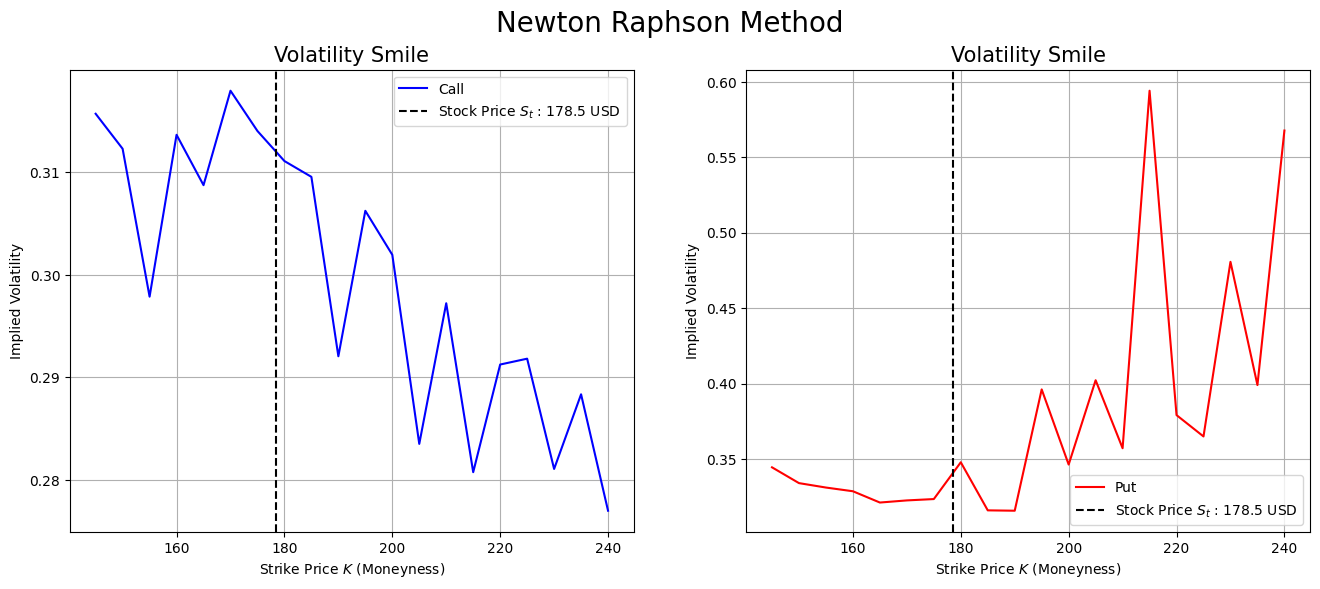

In [21]:
f,axes = plt.subplots(1,2,sharex=True)

axes = axes.flatten()

axes[0].plot(K_call,sigma_call,color='blue',label='Call')
axes[0].axvline(S,color='k',ls='--',label=f'Stock Price $S_t$ : {S} USD')
axes[0].set_title('Volatility Smile',size=15)
axes[0].set_xlabel(r'Strike Price $K$ (Moneyness)',size=10)
axes[0].set_ylabel('Implied Volatility',size=10)
axes[0].legend(loc='best')

axes[1].plot(K_put,sigma_put,color='red',label='Put')
axes[1].axvline(S,color='k',ls='--',label=f'Stock Price $S_t$ : {S} USD')
axes[1].set_title('Volatility Smile',size=15)
axes[1].set_xlabel(r'Strike Price $K$ (Moneyness)',size=10)
axes[1].set_ylabel('Implied Volatility',size=10)
axes[1].legend(loc='best')

plt.suptitle('Newton Raphson Method',size=20)

We can clearly see that the implied volatility is high when both call-put options are in the money (ITM) and low when the options are out of the money (OTM).

In [22]:
sc = least_squares_iv(call_market_price,S,K_call,T,rfr_cont,'call')
sp = least_squares_iv(put_market_price,S,K_put,T,rfr_cont,'put')

Text(0.5, 0.98, 'Least Squares Method')

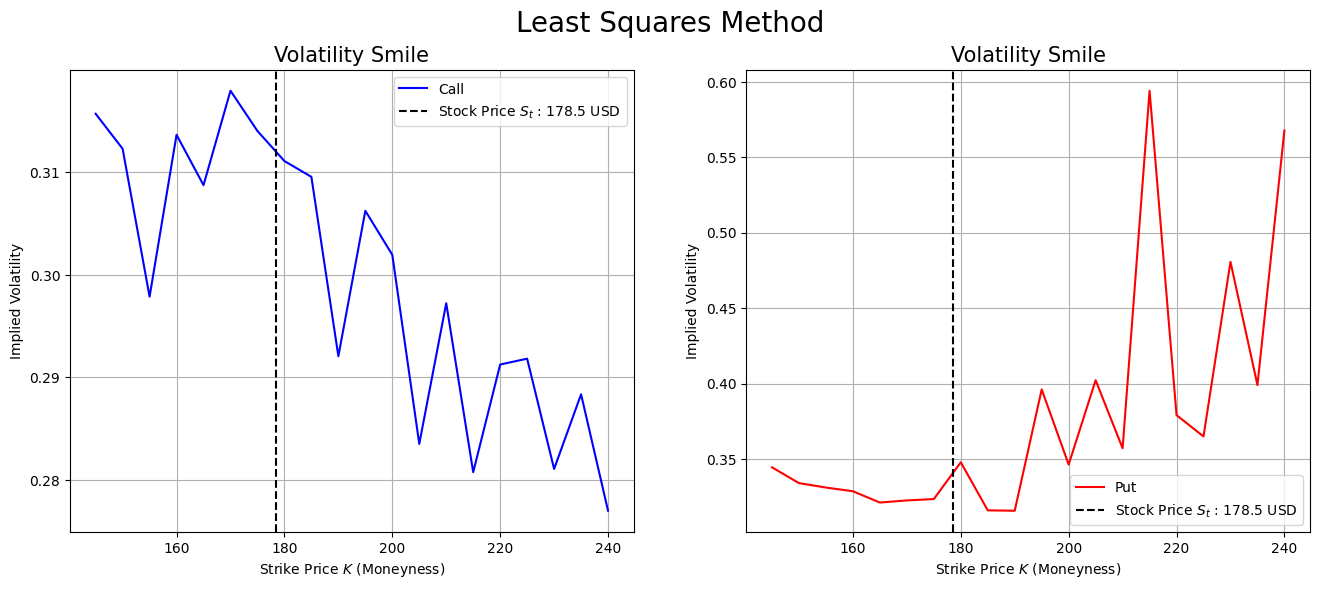

In [23]:
f,axes = plt.subplots(1,2,sharex=True)

axes = axes.flatten()

axes[0].plot(K_call,sc,color='blue',label='Call')
axes[0].axvline(S,color='k',ls='--',label=f'Stock Price $S_t$ : {S} USD')
axes[0].set_title('Volatility Smile',size=15)
axes[0].set_xlabel(r'Strike Price $K$ (Moneyness)',size=10)
axes[0].set_ylabel('Implied Volatility',size=10)
axes[0].legend(loc='best')

axes[1].plot(K_put,sp,color='red',label='Put')
axes[1].axvline(S,color='k',ls='--',label=f'Stock Price $S_t$ : {S} USD')
axes[1].set_title('Volatility Smile',size=15)
axes[1].set_xlabel(r'Strike Price $K$ (Moneyness)',size=10)
axes[1].set_ylabel('Implied Volatility',size=10)
axes[1].legend(loc='best')

plt.suptitle('Least Squares Method',size=20)

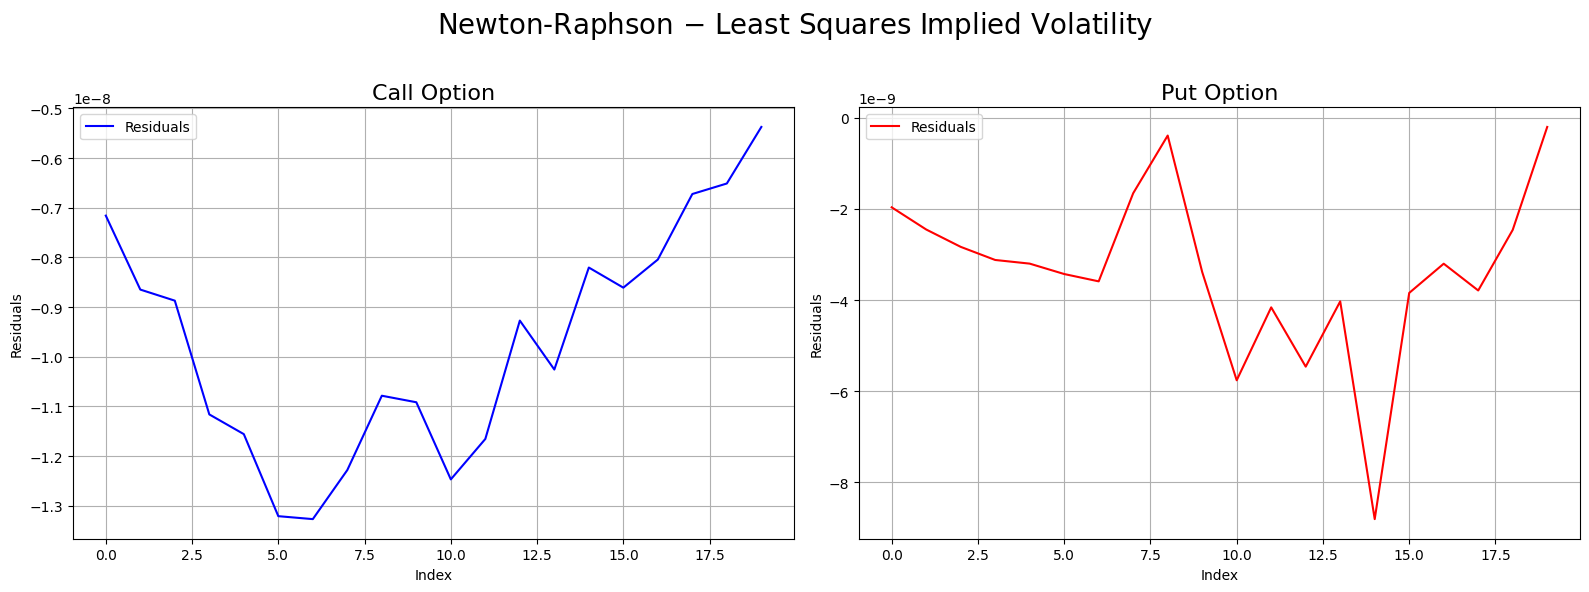

In [24]:
f,axes = plt.subplots(1,2,sharex=True)

axes = axes.flatten()

axes[0].plot(sigma_call - sc, color='blue', label='Residuals')
axes[0].set_title('Call Option', size=16)
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Residuals')
axes[0].legend(loc='best')

axes[1].plot(sigma_put - sp, color='red', label='Residuals')
axes[1].set_title('Put Option', size=16)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Residuals')
axes[1].legend(loc='best')

f.suptitle(r'Newton-Raphson $-$ Least Squares Implied Volatility', size=20)

plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()

The residuals are in an order of 1e-8 for the Call option and 1e-9 for the Put option which shows the similarity of the computed implied volatility using both methods Newton_Raphson and Least_Squares.

Now let's get some more data to plot the volatility surface.

In [25]:
# Fetch Amazon data
tick = yf.Ticker("AMZN")
S = tick.history(period='1d')['Close'][-1]

# Fetch the continuously compounded risk-free interest rate
rfr = yf.Ticker("^IRX").history(period='1d')['Close'][-1]
rfr = rfr / 100
rfr_cont = np.log(1 + rfr)

# Get the option expiration dates and option info
options_expiration = tick.options[13]
call_info = pd.DataFrame(tick.option_chain(options_expiration).calls)
put_info = pd.DataFrame(tick.option_chain(options_expiration).puts)

# Extract strikes and market prices
K_call = np.array(call_info['strike'])
K_put = np.array(put_info['strike'])
call_market_price = np.array(call_info['lastPrice'])
put_market_price = np.array(put_info['lastPrice'])

# Calculate time to maturity for each option
today = datetime.datetime.today()
expiration = datetime.datetime.strptime(options_expiration, '%Y-%m-%d')
days_to_maturity = (expiration - today).days
T = days_to_maturity / 365

# Define ranges for strikes and maturities
K_range = K_call[K_call.argmin():K_call.argmax()]
T_range = np.linspace(0.01, T, len(K_range))  # Create a range of maturities

# Initialize matrices for market prices and implied volatilities
market_prices_call = np.zeros((len(K_range), len(T_range)))
market_prices_put = np.zeros((len(K_range), len(T_range)))
implied_vols_call = np.zeros_like(market_prices_call)
implied_vols_put = np.zeros_like(market_prices_put)

# Calculate market prices for each combination of K and T
for i, K in enumerate(K_range):
    for j, T in enumerate(T_range):
        market_prices_call[i, j] = EuropeanOption(S, K, T, rfr_cont, sigma=0.25, Option_type='call').price + K * np.exp(-rfr_cont * T)
        market_prices_put[i, j] = EuropeanOption(S, K, T, rfr_cont, sigma=0.25, Option_type='put').price + K * np.exp(-rfr_cont * T)

# Compute implied volatilities using Newton-Raphson method
for i, K in enumerate(K_range):
    for j, T in enumerate(T_range):
        implied_vols_call[i, j] = least_squares_iv(market_prices_call[i, j], S, K, T, rfr_cont, 'call')
        implied_vols_put[i, j] = least_squares_iv(market_prices_put[i, j], S, K, T, rfr_cont, 'put')


In [26]:
plot_vol_surface(K_range,T_range,implied_vols_call,'call')
plot_vol_surface(K_range,T_range,implied_vols_put,'put')